In [2]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize']=10,8

In [3]:
#Load Dataset
dataset = pd.read_csv(r'c:/Python/Housing1.csv')
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,pricerange
0,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,1
1,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,1
2,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished,1
3,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,1
4,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,1


In [4]:
#Show Key Statistics
dataset.describe()

,price,area,bedrooms,bathrooms,stories,parking,pricerange
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578,4.256881
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586,1.825089
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000,3.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000,4.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,5.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000,10.000000


In [5]:
#Overview of Dataset Characteristics
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
 13  pricerange        545 non-null    int64 
dtypes: int64(7), object(7)
memory usage: 59.7+ KB


In [6]:
#Summary of N/A Values
dataset.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
pricerange          0
dtype: int64

In [7]:
#drop RH NAN rows
dataset.dropna(thresh=10,axis=0,inplace=True)

In [7]:
#Overview of Dataset Characteristics
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
 13  pricerange        545 non-null    int64 
dtypes: int64(7), object(7)
memory usage: 63.9+ KB


In [8]:
dataset=pd.get_dummies(data=dataset, columns=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'])

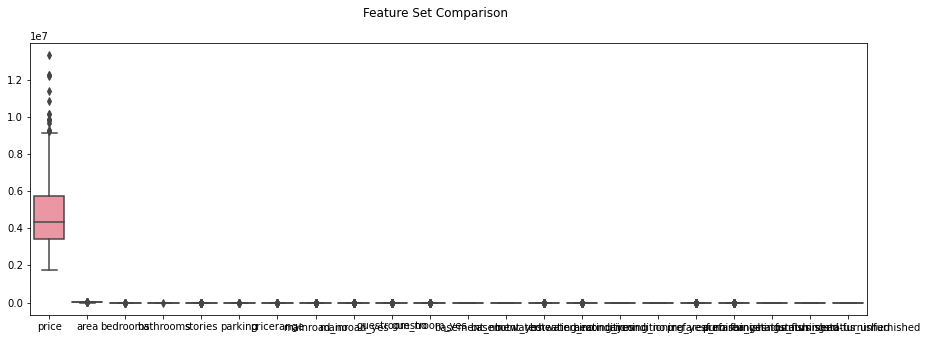

In [9]:
#BoxPlot Feature Set Comparison
fig = plt.figure(figsize=(15,5))
fig.suptitle('Feature Set Comparison')
ax = fig.add_subplot(111)
sns.boxplot(data=dataset)
plt.show()

In [10]:
#Create Profile Report
 
#Importing package
import pandas_profiling as pp
from IPython.display import IFrame
 
# Profile Report
HousingReport = pp.ProfileReport(dataset)
HousingReport.to_file('housing.html')
display(IFrame('housing.html', width=900, height=350))

Summarize dataset:   0%|          | 0/35 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
#remove outliers
Q1 = dataset.quantile(0.02)
Q3 = dataset.quantile(0.98)
IQR = Q3 - Q1
dataset = dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * 
IQR))).any(axis=1)]

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544 entries, 0 to 544
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            544 non-null    int64
 1   area                             544 non-null    int64
 2   bedrooms                         544 non-null    int64
 3   bathrooms                        544 non-null    int64
 4   stories                          544 non-null    int64
 5   parking                          544 non-null    int64
 6   pricerange                       544 non-null    int64
 7   mainroad_no                      544 non-null    uint8
 8   mainroad_yes                     544 non-null    uint8
 9   guestroom_no                     544 non-null    uint8
 10  guestroom_yes                    544 non-null    uint8
 11  basement_no                      544 non-null    uint8
 12  basement_yes                     544 non-null    u

<AxesSubplot:>

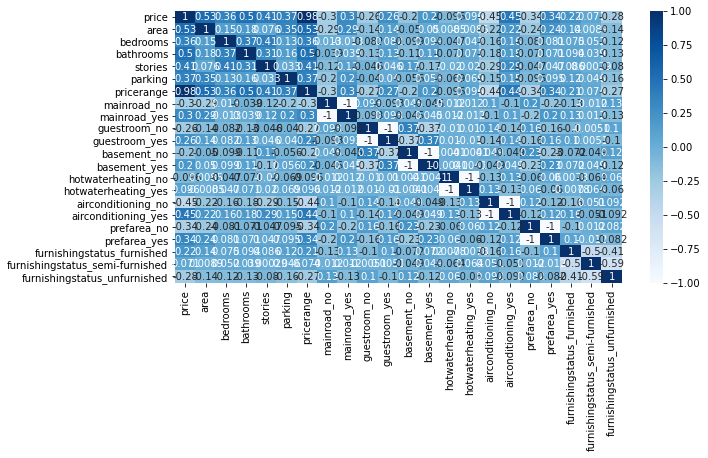

In [13]:
#Visualization of Correlations
fig = plt.figure(figsize=(10,5))
sns.heatmap(dataset.corr(),annot=True,cmap="Blues")

In [13]:
#Find Independent Column Correlations
def correlation(dataset,threshold):
    col_corr= [] # List of correlated columns
    corr_matrix=dataset.corr() #finding correlation between columns
    for i in range (len(corr_matrix.columns)): #Number of columns
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking correlation between columns
                colName=(corr_matrix.columns[i], corr_matrix.columns[j]) #getting correlated columns
                col_corr.append(colName) #adding correlated column name
    return col_corr #returning set of column names
col=correlation(dataset,0.8)
print('Correlated columns @ 0.8:', col)

Correlated columns @ 0.8: [('pricerange', 'price'), ('mainroad_yes', 'mainroad_no'), ('guestroom_yes', 'guestroom_no'), ('basement_yes', 'basement_no'), ('hotwaterheating_yes', 'hotwaterheating_no'), ('airconditioning_yes', 'airconditioning_no'), ('prefarea_yes', 'prefarea_no')]


In [14]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,parking,pricerange,mainroad_no,mainroad_yes,guestroom_no,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1750000,3620,2,1,1,0,1,0,1,1,...,0,1,0,1,0,1,0,0,0,1
1,1750000,2910,3,1,1,0,1,1,0,1,...,0,1,0,1,0,1,0,1,0,0
2,1750000,3850,3,1,2,0,1,0,1,1,...,0,1,0,1,0,1,0,0,0,1
3,1767150,2400,3,1,1,0,1,1,0,1,...,0,1,0,1,0,1,0,0,1,0
4,1820000,3000,2,1,1,2,1,0,1,1,...,1,1,0,1,0,1,0,0,0,1


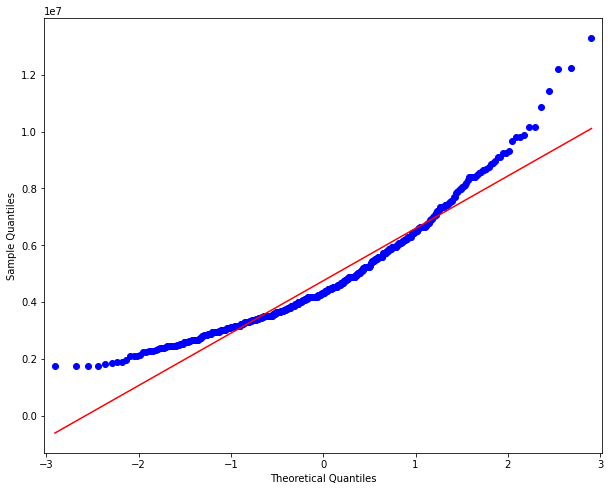

In [15]:
#Create Q-Q Plot
from statsmodels.graphics.gofplots import qqplot
import pylab
qqplot(dataset['price'],line='s')
pylab.show()

In [16]:
#Normality test - Shapiro-Wilk Test

#   p <= alpha(0.05): reject H0, not normal.
#   p > alpha(0.05): fail to reject H0, normal.

from scipy.stats import shapiro
stat, p = shapiro(dataset['price'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.926, p=0.000
Sample does not look Gaussian (reject H0)


In [17]:
#Create Standard Model

#Define x and y variable
x = dataset.drop(['price','pricerange'],axis=1).to_numpy()
y = dataset['price'].to_numpy()

#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

x_2 = sc.transform(x)

#Model
from sklearn.linear_model import LinearRegression

In [18]:
model = [LinearRegression()] 

In [19]:
#Create Model Comparison
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

#Scoring Parameters
scoring = {'MAE':'neg_mean_absolute_error',
           'MSE':'neg_mean_squared_error'}

#Model Creation
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in model:
    
    #K-Fold CV
    kfcv = alg.fit(x_train2, y_train)
    kf = KFold(n_splits=10, shuffle=True, random_state=100)
    KFcv = cross_validate(kfcv, x_2, y, scoring=scoring,
                         cv=kf)
    
    #Repeated K-Fold CV
    rkfcv = alg.fit(x_train2, y_train)
    rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    rKFcv = cross_validate(rkfcv, x_2, y, scoring=scoring,
                         cv=rkf)
    
    #Shuffle-Split
    rsmodel=alg.fit(x_train2, y_train)
    rs = ShuffleSplit(n_splits=10, test_size=.20, random_state=100)
    rscv = cross_validate(rsmodel, x_2, y, scoring=scoring,
                         cv=rs)
        
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'Algorithm Name'] = MLA_name
    MLA_compare.loc[row_index, 'KFcv Model'] = round(np.sqrt(-KFcv['test_MSE'].mean()),2)
    MLA_compare.loc[row_index, 'rKFcv Model'] = round(np.sqrt(-rKFcv['test_MSE'].mean()),2)
    MLA_compare.loc[row_index, 'ShuffleSplit Model'] = round(np.sqrt(-rscv['test_MSE'].mean()),2)
    
    row_index+=1

MLA_compare

,Algorithm Name,KFcv Model,rKFcv Model,ShuffleSplit Model
0,LinearRegression,1086483.84,1083554.4,1040562.61


In [20]:
#LOOCV
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from numpy import mean
from sklearn import metrics

model = LinearRegression()
loocv =  LeaveOneOut()
# evaluate model
scoreloocv = cross_val_score(model, x_2, y, scoring='neg_mean_absolute_error', cv=loocv)
print('RMSE - LOOCV:',round(mean(-scoreloocv),2))   

RMSE - LOOCV: 797055.46


In [21]:
#Create Model

from sklearn import metrics

for name,method in [('Linear regression', LinearRegression())]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)

print('\nOriginal Model')
print('\nMethod: {}'.format(name))   

#Coefficents
print('\nIntercept: {:.2f}'.format(float(method.intercept_)))
coeff_table=pd.DataFrame(np.transpose(method.coef_),dataset.drop(['price','pricerange'],axis=1).columns,columns=['Coefficients'])
print(coeff_table)
    
#R2,MAE,MSE and RMSE
print('\nR2: {:.2f}'.format(metrics.r2_score(y_test,predict)))
adjusted_r_squared = 1-(1-metrics.r2_score(y_test,predict))*(len(y)-1)/(len(y)-x.shape[1]-1)
print('Adj_R2: {:0.2f}'.format(adjusted_r_squared))
print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, predict)))  
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, predict)))  
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predict))))       


Original Model

Method: Linear regression

Intercept: 4747232.48
                                 Coefficients
area                             5.790437e+05
bedrooms                         7.945462e+04
bathrooms                        4.528907e+05
stories                          4.092193e+05
parking                          2.403993e+05
mainroad_no                     -2.657331e+18
mainroad_yes                    -2.657331e+18
guestroom_no                     1.513160e+18
guestroom_yes                    1.513160e+18
basement_no                     -7.934976e+17
basement_yes                    -7.934976e+17
hotwaterheating_no               1.198742e+18
hotwaterheating_yes              1.198742e+18
airconditioning_no              -1.036450e+18
airconditioning_yes             -1.036450e+18
prefarea_no                      1.376032e+19
prefarea_yes                     1.376032e+19
furnishingstatus_furnished       1.939507e+18
furnishingstatus_semi-furnished  2.152490e+18
furnishingstat

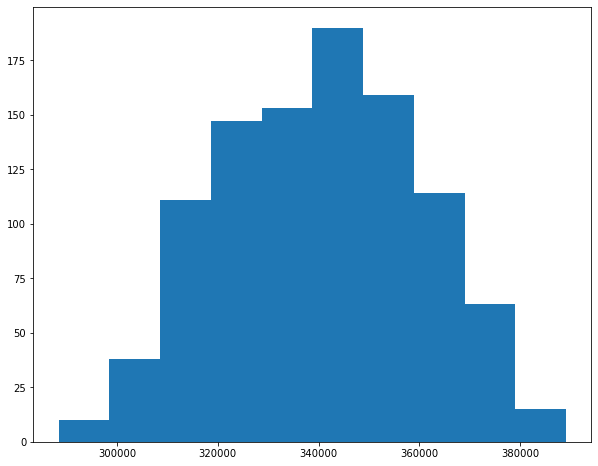

Bootstrapping RMSE: 340460.29

95.0% Confidence Interval: RMSE 304998.17 to 376874.27


In [22]:
# configure bootstrap
from sklearn.utils import resample

n_iterations = 1000
n_size = int(len(dataset) * 0.50)
# run bootstrap
stats = list()
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(dataset.values, n_samples=n_size)
    test = np.array([x for x in dataset.values if x.tolist() not in train.tolist()])
    # fit model
    model = LinearRegression()
    model.fit(train[:,1:], train[:,0])
    # evaluate model
    predictions = model.predict(test[:,1:])
    score = np.sqrt(metrics.mean_squared_error(test[:,0], predictions))
    #print(score)
    stats.append(score)
# plot scores
plt.hist(stats)
plt.show()

#Mean of RMSE
meanRMSE = mean(stats)
print('Bootstrapping RMSE:',round(meanRMSE,2))

#Confidence Intervals
alpha = .95
p = ((1.0-alpha)/2.0) * 100
lower = np.percentile(stats, p)
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = np.percentile(stats, p)
print('\n{}% Confidence Interval: RMSE {} to {}'.format(alpha*100,round(lower,2),round(upper,2)))  